<a href="https://colab.research.google.com/github/arifuddinatif/Quantitative-Analysis-and-Modeling-for-S-P-500/blob/main/S%26P_500_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt


In [158]:
#col_names = ['Date','Open','High','Low','Close','Volume','Name']
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/S&P 500/cs-1 data set.csv')

In [28]:
df.head()

,date,open,high,low,close,volume,Name
0,2/8/2013,15.07,15.12,14.63,14.75,8407500,AAL
1,2/11/2013,14.89,15.01,14.26,14.46,8882000,AAL
2,2/12/2013,14.45,14.51,14.10,14.27,8126000,AAL
3,2/13/2013,14.30,14.94,14.25,14.66,10259500,AAL
4,2/14/2013,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619040 non-null  float64
 2   high    619040 non-null  float64
 3   low     619040 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [ ]:
df.describe() 

,open,high,low,close,volume
count,619040.000000,619040.000000,619040.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.377904,98.206884,96.506797,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.535375,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [ ]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [159]:
df['open'] = df['open'].fillna(df['open'].mean())
df['high'] = df['high'].fillna(df['high'].mean())
df['low'] = df['low'].fillna(df['low'].mean())

In [ ]:
type(df['date'][0])

str

In [160]:
df['date'] = pd.to_datetime(df['date'], errors ='coerce')

In [ ]:
df['Name'].unique()

In [197]:
df.head(6)

,date,open,high,low,close,volume,Name,week number,year
0,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,7,2013
1,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,7,2013
2,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,7,2013
3,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,7,2013
4,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,7,2013
5,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL,8,2013


In [162]:
df = df[1:]
df = df.reset_index(drop=True)

In [164]:
import datetime as dt
df['date'].astype('int64').dtypes
df['week number'] = df['date'].dt.week
df['year'] = df['date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [165]:
DF = df.sort_values(['week number','year','date']).reset_index(drop=True)
                       

In [ ]:
DF

In [169]:
Grouped_DF = DF.groupby(by=['Name','week number','year'])['open','close'].agg(['first','last'])
                                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [170]:
Grouped_DF = Grouped_DF.reset_index(drop=False)

In [176]:
Grouped_DF.head(10)

Name week number  year   open  ... open-first close-last diference volatility
                          first  ...                                           
0    A           1  2013  57.05  ...      57.05      57.19      0.14   0.002454
1    A           1  2014  57.10  ...      57.10      40.94     16.16   0.283012
2    A           1  2015  41.18  ...      41.18      40.56      0.62   0.015056
3    A           1  2016  41.06  ...      41.06      38.59      2.47   0.060156
4    A           1  2017  45.93  ...      45.93      47.99      2.06   0.044851
5    A           1  2018  67.42  ...      67.42      69.90      2.48   0.036784
6    A           2  2014  57.40  ...      57.40      58.93      1.53   0.026655
7    A           2  2015  40.32  ...      40.32      40.59      0.27   0.006696
8    A           2  2016  38.71  ...      38.71      37.11      1.60   0.041333
9    A           2  2017  48.01  ...      48.01      48.69      0.68   0.014164

[10 rows x 11 columns]

In [172]:
Grouped_DF['open-first'] = Grouped_DF['open']['first']
Grouped_DF['close-last'] = Grouped_DF['close']['last']
Grouped_DF['diference'] = abs(Grouped_DF['close-last']-Grouped_DF['open-first'])
Grouped_DF['volatility'] = Grouped_DF['diference']/Grouped_DF['open-first']

In [182]:
volatility_df = Grouped_DF.loc[:,['Name','week number','year','volatility']]

In [183]:
volatility_df

,Name,week number,year,volatility
,,,,
0,A,1,2013,0.002454
1,A,1,2014,0.283012
2,A,1,2015,0.015056
3,A,1,2016,0.060156
4,A,1,2017,0.044851
...,...,...,...,...
129316,ZTS,52,2014,0.014459
129317,ZTS,52,2015,0.027760
129318,ZTS,52,2016,0.004649


In [ ]:
type(volatility_df['week number'][0])

In [ ]:
volatility_df[(volatility_df['week number'] <= 7) & (volatility_df['week number'] >= 3)]

In [298]:
y = volatility_df[((volatility_df['week number'] <= 52) & (volatility_df['week number'] >= 3)) & ((volatility_df['year'] <= 2015) & (volatility_df['year'] >= 2013))]

In [299]:
y = y.sort_values(['volatility'],ascending = False).reset_index(drop=True)

In [301]:
y

,Name,week number,year,volatility
,,,,
0,CHD,21,2014,0.819925
1,NI,27,2015,0.633045
2,VRTX,16,2013,0.541232
3,DISCK,32,2014,0.501339
4,DISCA,32,2014,0.493774
...,...,...,...,...
71385,ANSS,3,2014,0.000000
71386,RHI,30,2013,0.000000
71387,LKQ,38,2013,0.000000


In [302]:
 y = y.groupby(['week number'])['volatility','Name','year']
# y = pd.DataFrame(y)
#y = y.sort_values(['week number','volatility'],ascending = False).reset_index(drop=True)


KeyError: ignored

In [195]:
x = '2013-02-11'
x = x.split('-')
x_week_number = dt.date(int(x[0]), int(x[1]), int(x[2])).isocalendar()[1]
x_year = dt.date(int(x[0]), int(x[1]), int(x[2])).isocalendar()[0]
print(x_week_number,x_year)

7 2013


In [277]:
def vol(start_date,end_date):

  start_date = start_date.split('-')
  start_week_number = dt.date(int(start_date[0]), int(start_date[1]), int(start_date[2])).isocalendar()[1]
  start_year = dt.date(int(start_date[0]), int(start_date[1]), int(start_date[2])).isocalendar()[0]

  end_date = end_date.split('-')
  end_week_number = dt.date(int(end_date[0]), int(end_date[1]), int(end_date[2])).isocalendar()[1]
  end_year = dt.date(int(end_date[0]), int(end_date[1]), int(end_date[2])).isocalendar()[0]

  weekly_vols = volatility_df[((volatility_df['week number'] <= end_week_number) & (volatility_df['week number'] >= start_week_number)) & ((volatility_df['year'] <= end_year) & (volatility_df['year'] >= start_year))]
  weekly_vols = weekly_vols.sort_values(['volatility'],ascending = False).reset_index(drop=True)
  #weekly_vols 
  return print(f'top 10 most volatile stocks in the given date range are \n\n {weekly_vols.head(10)} \n\n least 10 volatile stocks in the given date range are \n\n {weekly_vols.tail(10)}')



In [290]:
vol('2016-2-20','2018-7-5')

top 10 most volatile stocks in the given date range are 

    Name week number  year volatility
                                    
0   CHK           9  2016   0.801418
1   AMD          16  2016   0.494382
2    UA          14  2016   0.469788
3   CHK          15  2016   0.463592
4   FTV          26  2016   0.403300
5   RRC           9  2016   0.342193
6   CHK          18  2016   0.327965
7  BHGE          27  2017   0.310727
8   MRO           9  2016   0.295642
9   CHK           8  2016   0.291866 

 least 10 volatile stocks in the given date range are 

        Name week number  year volatility
                                        
20937   XEL          24  2016        0.0
20938   XRX          26  2016        0.0
20939   HBI           7  2017        0.0
20940  NDAQ          11  2017        0.0
20941  NDAQ          20  2017        0.0
20942   XRX          27  2017        0.0
20943   RCL          13  2017        0.0
20944   WEC          27  2016        0.0
20945  ROST          18  201

# AAL stock weekly volatility

In [59]:
ticker_AAL = df[df['Name'] == 'AAL']

In [61]:
ticker_AAL.head(7)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL


In [62]:
ticker_AAL['open']/ticker_AAL['close'].shift(7)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1254    0.926402
1255    0.976273
1256    0.980019
1257    0.929339
1258    0.966401
Length: 1259, dtype: float64

In [23]:
ticker_AAL['Log returns'] = (ticker_AAL['close']/ticker_AAL['close'].shift())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
volatility_AAL = ticker_AAL['Log returns'].std()*5**0.5

In [25]:
volatility_AAL

0.05021398673292593

Text(0.5, 1.0, 'AAL volatility: 5.0 %')

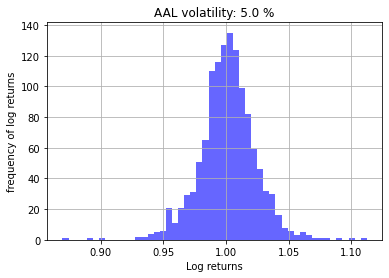

In [26]:
str_vol = round(volatility_AAL, 3)*100

fig, ax = plt.subplots()
ticker_AAL['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log returns')
ax.set_ylabel('frequency of log returns')
ax.set_title(f'AAL volatility: {str_vol} %')

#AAPL stock weekly volatility

In [ ]:
ticker_AAPL = df[df['Name'] == 'AAPL']

In [ ]:
ticker_AAPL.tail(7)

,date,open,high,low,close,volume,Name,Log returns
2511,2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL,-0.005912
2512,2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL,0.002751
2513,2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL,0.002088
2514,2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL,-0.044360
2515,2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL,-0.025302
2516,2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL,0.040942
2517,2018-02-07,163.085,163.4000,159.0685,159.54,51608580,AAPL,-0.021640


In [ ]:
ticker_AAPL['Log returns'] = np.log(ticker_AAPL['close']/ticker_AAPL['close'].shift())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
volatility_AAPL = ticker_AAPL['Log returns'].std()*5**0.5

In [ ]:
volatility_AAPL

0.03262317205793467

Text(0.5, 1.0, 'AAPL volatility: 3.3000000000000003 %')

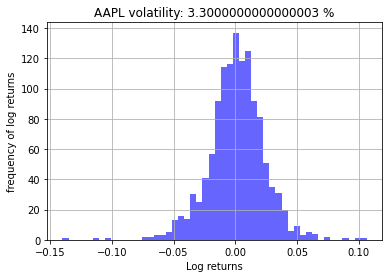

In [ ]:
str_vol = round(volatility_AAPL, 3)*100

fig, ax = plt.subplots()
ticker_AAL['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log returns')
ax.set_ylabel('frequency of log returns')
ax.set_title(f'AAPL volatility: {str_vol} %')

#Function to calculate weekly volatility

In [291]:
def weekly_volatility(stock_ticker,start_date,end_date):

  stock_df = df[(df['Name'] == stock_ticker) & (df['date'].between(start_date,end_date))]
  stock_df['Log returns'] = np.log(stock_df['close']/stock_df['close'].shift())
  volatility = stock_df['Log returns'].std()*5**0.5
  volatility = round(volatility, 3)*100
  return volatility

In [ ]:
all_tickers = list(df['Name'].unique())

In [ ]:
tickers_df = pd.DataFrame(all_tickers) 

In [ ]:
tickers_df.rename(columns = {0:'stock name'},inplace = True)

In [ ]:
tickers_df

In [ ]:
all_volatilities = []
for i in all_tickers:
  all_volatilities.append(weekly_volatility(i,'2013-02-08','2015-02-07'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
all_volatilities

In [ ]:
tickers_df['volatility'] = all_volatilities

In [ ]:
tickers_df.sort_values('volatility',ascending = False,inplace=True)

In [ ]:
tickers_df.reset_index(inplace=True)

In [ ]:
tickers_df.drop(columns = ['index'],axis=1,inplace = True)

In [ ]:
tickers_df.head(10)

,stock name,volatility
0,DISCK,7.9
1,DISCA,7.8
2,VRTX,7.7
3,INCY,6.9
4,AMD,6.7
5,BBY,6.6
6,NFLX,6.4
7,QRVO,6.0
8,UAL,5.8
9,NFX,5.8


In [ ]:
tickers_df.tail(10)

,stock name,volatility
495,EVHC,NaN
496,FTV,NaN
497,HLT,NaN
498,HPE,NaN
499,HPQ,NaN
500,KHC,NaN
501,PYPL,NaN
502,UA,NaN
503,WLTW,NaN
504,WRK,NaN


In [292]:
def most_and_least_volatile_stocks(start_date,end_date):

  all_tickers = list(df['Name'].unique())
  all_volatilities = []
  for i in all_tickers:
    all_volatilities.append(weekly_volatility(i,start_date,end_date))
  tickers_df = pd.DataFrame(all_tickers) 
  tickers_df.rename(columns = {0:'stock name'},inplace = True)
  tickers_df['volatility'] = all_volatilities
  tickers_df.sort_values('volatility',ascending = False,inplace=True)
  tickers_df.reset_index(inplace=True)
  tickers_df.drop(columns = ['index'],axis=1,inplace = True)
  tickers_df.dropna(how='any',axis=0,inplace = True)
  return print(f'Top 10 volatile stocks : \n\n {tickers_df.head(10)} \n\n Least volatile stocks : \n\n {tickers_df.tail(10)}')

In [293]:
most_and_least_volatile_stocks('2016-2-20','2018-7-5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Top 10 volatile stocks : 

   stock name  volatility
0        CHK        10.4
1        LNT        10.1
2        AMD         9.6
3       BHGE         9.1
4        MRO         7.9
5        FCX         7.5
6        NWL         7.3
7       EVHC         7.1
8         UA         6.7
9        STX         6.7 

 Least volatile stocks : 

     stock name  volatility
495        MCD         1.9
496        APH         1.9
497      BRK.B         1.9
498        MMC         1.9
499        JNJ         1.8
500        RSG         1.8
501         PG         1.8
502         KO         1.7
503         WM         1.7
504        PEP         1.7


#Pair trading

In [ ]:
df_2 = df.groupby(['date','Name'])['close'].mean().unstack()

In [ ]:
df_2.head()

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,ANDV,...,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,30.22,60.925,154.08,38.89,32.61,44.57,11.07,50.60,50.35,87.45,38.79,28.57,38.56,37.97,35.42,62.66,32.73,24.335,45.14,NaN,93.66,13.61,2.59,41.46,146.45,86.77,66.49,77.06,261.95,53.86,...,90.09,39.4500,71.10,36.4357,59.28,46.13,56.08,84.51,54.90,45.39,46.00,67.42,44.35,92.53,41.40,48.49,40.06,34.88,107.32,NaN,36.30,36.00,71.48,NaN,14.66,30.21,59.89,126.52,66.60,27.84,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,30.28,60.340,153.42,38.89,32.84,44.73,11.20,50.38,50.26,86.66,39.45,28.92,38.48,37.88,35.31,62.76,33.03,24.400,45.25,NaN,92.30,13.66,2.67,41.51,145.57,84.92,66.49,76.38,257.21,54.55,...,89.61,39.0825,71.11,36.2119,59.31,46.14,55.65,84.80,54.62,45.66,45.70,67.70,44.32,92.47,41.48,48.60,40.14,35.26,106.47,NaN,36.31,35.74,71.40,NaN,14.25,30.14,59.62,124.10,66.75,27.94,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,30.81,60.360,152.32,38.91,33.15,44.90,11.31,50.15,49.50,85.78,38.63,29.16,41.05,37.82,36.74,62.70,33.02,24.430,45.61,NaN,90.21,13.66,2.77,41.82,145.75,84.54,67.49,75.59,258.70,53.49,...,89.98,39.2000,71.36,36.3524,59.12,45.65,56.12,85.57,54.23,45.53,45.89,68.16,44.44,91.99,41.95,48.18,39.93,35.51,110.81,NaN,36.46,35.84,71.40,NaN,14.34,30.31,59.62,122.67,67.00,28.00,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,31.16,60.450,152.32,38.66,33.28,44.93,11.34,49.51,48.65,86.73,38.87,28.90,41.39,38.54,37.31,66.15,32.75,24.760,45.88,NaN,92.01,13.77,2.75,42.00,146.47,84.94,67.89,74.00,269.47,54.07,...,89.50,38.6925,71.50,36.2667,59.55,46.24,55.86,85.59,54.57,45.58,46.48,68.11,44.52,93.22,41.48,48.63,39.84,35.13,110.98,NaN,36.64,35.64,71.39,NaN,14.17,30.48,59.05,122.40,67.75,27.92,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,31.40,60.740,152.37,38.67,33.14,44.77,11.21,49.56,48.83,86.49,39.21,28.97,42.01,38.82,37.87,65.41,32.56,24.355,45.88,NaN,87.63,13.89,2.75,41.91,147.34,84.72,69.04,73.48,269.24,55.18,...,89.69,38.9950,70.96,36.3833,59.95,47.23,54.87,85.04,54.27,45.67,45.66,67.78,44.33,93.47,41.86,48.81,39.45,35.21,111.00,NaN,37.14,35.46,70.82,NaN,14.14,30.44,58.83,123.20,67.25,27.89,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


In [ ]:
df_2_corr = df_2.corr()

In [ ]:
df_2_corr

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,ANDV,...,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.215610,-0.494130,0.400368,0.509901,-0.203687,0.418756,0.396183,0.563067,0.528455,0.059479,0.536394,0.016738,0.648773,0.446129,0.324320,0.161013,0.391529,0.685970,-0.354078,0.199423,0.085983,0.393756,0.734676,-0.183543,0.761624,0.693044,-0.011662,0.530450,0.380228,-0.267635,0.703847,0.668227,0.668967,0.234500,0.151985,0.576603,0.526068,0.485901,0.034831,...,0.677422,0.416401,0.579587,0.041968,-0.081340,0.356999,0.217125,-0.377814,0.296390,0.379437,0.282482,-0.091137,0.036198,0.499103,-0.174243,0.374429,0.296313,0.223890,0.021030,0.965261,0.460757,-0.019867,0.605842,0.599065,-0.021931,0.445268,0.580213,0.625099,0.264419,0.364688,0.157963,0.713500,0.209477,0.151394,-0.286090,0.642727,-0.030249,0.235464,0.710644,0.374168
AAL,0.215610,1.000000,0.535983,0.835114,0.723115,0.773192,0.760103,0.630869,0.685319,0.693745,0.584007,0.747373,0.645005,0.688951,0.672052,0.699121,-0.277831,0.744840,0.547090,0.671934,0.798716,0.690396,0.679925,0.565841,0.631942,0.387462,0.553606,0.784944,0.762500,0.540907,0.502668,0.619027,0.425386,0.705954,0.249133,0.812976,0.796812,0.686429,0.566225,0.740135,...,0.579362,0.721794,0.747918,0.729729,-0.444739,0.776163,0.650284,0.296246,0.595177,0.626938,0.717429,-0.142167,-0.112435,0.638350,0.764923,0.514376,0.634749,0.895007,0.763911,0.684177,0.652751,0.070957,0.232146,0.724815,0.567213,0.560744,0.784034,-0.086732,0.578909,0.633106,0.729636,0.553129,-0.309139,0.665504,0.008729,0.641955,0.218472,0.772007,0.519378,0.695370
AAP,-0.494130,0.535983,1.000000,0.264125,0.131630,0.701997,0.163286,0.196554,0.091777,0.105304,0.523167,0.172007,0.514513,-0.017303,0.185841,0.283888,-0.192786,0.253742,-0.035731,0.816159,0.552658,0.465989,0.339502,-0.119073,0.695309,-0.287458,-0.145324,0.634683,0.113612,-0.207999,0.598018,-0.102406,-0.150485,-0.007887,-0.043969,0.500019,0.124131,0.114280,0.112434,0.436911,...,-0.079093,0.226998,0.100058,0.524436,-0.232424,0.300473,0.417842,0.646545,0.283275,0.194151,0.178969,-0.186850,0.024448,0.094303,0.805514,0.031414,0.273470,0.540135,0.565344,-0.864199,0.168314,0.066305,-0.439141,-0.363294,0.505245,0.036348,0.054230,-0.482156,0.527933,0.190904,0.328782,-0.104707,-0.230396,0.469657,0.239541,0.040747,0.248917,0.499423,-0.136549,0.186245
AAPL,0.400368,0.835114,0.264125,1.000000,0.887866,0.673544,0.894304,0.848683,0.906094,0.914892,0.392739,0.904386,0.377339,0.896269,0.839766,0.837611,-0.450214,0.933700,0.780200,0.448273,0.810880,0.799374,0.808482,0.815303,0.424089,0.690419,0.829886,0.773738,0.950665,0.840938,0.154773,0.853018,0.676133,0.849978,0.150510,0.879580,0.848217,0.901648,0.819078,0.837432,...,0.580796,0.914426,0.868347,0.567265,-0.679652,0.859597,0.789712,-0.089436,0.805522,0.838729,0.842370,-0.111257,-0.081676,0.886631,0.654958,0.374181,0.788385,0.820022,0.698409,0.906701,0.865229,-0.116098,0.357884,0.783801,0.647636,0.627195,0.909523,-0.188241,0.418966,0.835748,0.838297,0.762623,-0.525019,0.768427,-0.355464,0.831831,0.249553,0.778762,0.755852,0.928463
ABBV,0.509901,0.723115,0.131630,0.887866,1.000000,0.544060,0.921130,0.852036,0.897021,0.850391,0.326123,0.875641,0.288917,0.844560,0.796590,0.791937,-0.353725,0.903210,0.832225,0.287388,0.692932,0.689738,0.730868,0.846897,0.347373,0.713032,0.892063,0.576436,0.908383,0.772704,0.109738,0.845013,0.611861,0.877723,0.206797,0.826871,0.838654,0.874523,0.809855,0.758577,...,0.594271,0.891765,0.891574,0.622984,-0.622188,0.836173,0.716643,-0.225943,0.797983,0.820224,0.817300,-0.113511,0.097485,0.876392,0.497778,0.294745,0.759915,0.752834,0.589347,0.881059,0.833150,-0.139087,0.540984,0.690819,0.575864,0.628038,0.8

In [ ]:
paired_df = df_2_corr.unstack()
sorted_pairs = paired_df.sort_values(kind="quicksort")
sorted_pairs = pd.DataFrame(sorted_pairs)
sorted_pairs.rename(columns = {0:'close'},inplace = True)
sorted_pairs.sort_values('close',ascending = False,inplace=True)

In [ ]:
sorted_pairs[510:520:2]

,,close
Name,Name,
CMS,XEL,0.993641
UAA,UA,0.992830
FOXA,FOX,0.992754
NOC,LMT,0.991380
UNH,CTAS,0.989285


In [ ]:
def top_5_pairs(year):

  df['year'] = pd.DatetimeIndex(df['date']).year
  df_2 = df[df['year'] == year]
  df_2 = df_2.groupby(['date','Name'])['close'].mean().unstack()
  df_2_corr = df_2.corr()
  paired_df = df_2_corr.unstack()
  sorted_pairs = paired_df.sort_values(kind="quicksort")
  sorted_pairs = pd.DataFrame(sorted_pairs)
  sorted_pairs.rename(columns = {0:'close'},inplace = True)
  sorted_pairs.sort_values('close',ascending = False,inplace=True)
  return sorted_pairs[510:520:2]

In [ ]:
top_5_pairs(2018)

,,close
Name,Name,
FRT,REG,0.993388
FOXA,FOX,0.992806
NWSA,NWS,0.991010
PH,UPS,0.989953
LNT,PNW,0.989406


In [ ]:
top_5_pairs(2017)

,,close
Name,Name,
NWS,NWSA,0.998061
FOX,FOXA,0.997253
UAA,UA,0.994546
RTN,LMT,0.992387
MA,PYPL,0.990314


# Binary classification

In [ ]:
y = np.where(df['close'] > df['open'],1,-1)

df['open-close'] = df.open - df.close
df['high-low'] = df.high - df.low
x = df[['open-close','high-low']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [ ]:
#cls = SVC().fit(x_train, y_train)


In [ ]:
#accuracy_train = accuracy_score(y_train, cls.predict(x_train))
#accuracy_test = accuracy_score(y_test, cls.predict(x_test))

In [ ]:
#print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
#print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))

In [ ]:
model = LogisticRegression()
model = model.fit (x_train,y_train)

In [ ]:
probability = model.predict_proba(x_test)
print(probability)

predicted = model.predict(x_test)

[[0.36874464 0.63125536]
 [0.45293899 0.54706101]
 [0.0522877  0.9477123 ]
 ...
 [0.51131237 0.48868763]
 [0.74929475 0.25070525]
 [0.53570247 0.46429753]]


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[57290  3035]
 [    0 63483]]


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       1.00      0.95      0.97     60325
           1       0.95      1.00      0.98     63483

    accuracy                           0.98    123808
   macro avg       0.98      0.97      0.98    123808
weighted avg       0.98      0.98      0.98    123808



In [ ]:
print(model.score(x_test,y_test))

0.9754862367536831


In [ ]:
cross_val = cross_val_score(LogisticRegression(), x, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.99998385 0.99996769 0.99998385 0.99996769 0.99988692 1.
 0.99990308 0.99998385 0.99995154 0.99996769]
0.9999596148875678
